<a href="https://colab.research.google.com/github/JhonaGo/BI-Tools/blob/main/MultipleForecasting_Nixtla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My KeyApi

https://dashboard.nixtla.io/1268227/profile

In [ ]:
#| hide
!pip install -Uqq nixtla

In [ ]:
#| hide
from nixtla.utils import in_colab

In [ ]:
#| hide
IN_COLAB = in_colab()

In [ ]:
#| hide
if not IN_COLAB:
    from nixtla.utils import colab_badge
    from dotenv import load_dotenv

# Multiple series forecasting

TimeGPT provides a robust solution for multi-series forecasting, which involves analyzing multiple data series concurrently, rather than a single one. The tool can be fine-tuned using a broad collection of series, enabling you to tailor the model to suit your specific needs or tasks.

Note that the forecasts are still univariate. This means that although TimeGPT is a global model, it won't consider the inter-feature relationships within the target series. However, TimeGPT does support the use of exogenous variables such as categorical variables (e.g., category, brand), numerical variables (e.g., temperature, prices), or even special holidays.

Let's see this in action.

In [ ]:
#| echo: false
if not IN_COLAB:
    load_dotenv()
    colab_badge('docs/tutorials/05_multiple_series')

## 1. Import packages
First, we install and import the required packages and initialize the Nixtla client.

As always, we start off by intializing an instance of `NixtlaClient`.

In [ ]:
import pandas as pd
from nixtla import NixtlaClient

In [ ]:
nixtla_client = NixtlaClient(
    api_key = 'nixak-Otdki6PekqDUWrzJlUMB2LjS5v1cH5z8kzNPQql4NJSPvWMVZ7oRMn4mGwJo79e30C6pk7d0zDuYD5uw' # Replace with your actual API key
)

> 👍 Use an Azure AI endpoint
>
> To use an Azure AI endpoint, remember to set also the `base_url` argument:
>
> `nixtla_client = NixtlaClient(base_url="you azure ai endpoint", api_key="your api_key")`

In [ ]:
#| hide
if not IN_COLAB:
    nixtla_client = NixtlaClient()

## 2. Load the data

The following dataset contains prices of different electricity markets in Europe.

Mutliple series are automatically detected in TimeGPT using the `unique_id` column. This column contains labels for each series. If there are multiple unique values in that column, then it knows it is handling a multi-series scneario.

In this particular case, the `unique_id` column contains the value BE, DE, FR, JPM, and NP.

In [ ]:
#df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/electricity-short.csv')

#df.head()

In [ ]:
df = pd.read_excel("data.xlsx")

# rename columns
df.columns = ['ds', 'unique_id', 'y']
df['ds'] = pd.to_datetime(df['ds'])

# TimeGaps
min_date = df['ds'].min()
max_date = df['ds'].max()
full_date_range = pd.date_range(start=min_date, end=max_date, freq='D')

# complete df without absence of date
df_completed = df.groupby('unique_id', group_keys=False).apply(lambda group: group.set_index('ds').asfreq('MS')).reset_index()
df_completed

# fill id with the previous entrance
df_completed['unique_id']= df_completed['unique_id'].ffill()

# transpose df
df_completed = df_completed.pivot(index='ds', columns='unique_id', values='y')

df_completed

/tmp/ipython-input-2470386941.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_completed = df.groupby('unique_id', group_keys=False).apply(lambda group: group.set_index('ds').asfreq('MS')).reset_index()


unique_id,AARID PARA ADULTO CHICA 6/12,ADULT PANTS AFFECTIVE ACTIVE G 6/10,AP AFFECTIVE ACTIVE GRANDE 4/18 AP,AP AFFECTIVE ACTIVE MEDIANO 4/20 AP,FIORE ANATOMICA SIN ALAS 12/8 TF,FIORE PANTYPROTECTOR REGULAR 24/20 TF,FIORE ULTRADELGADA CON ALAS 12/10S TF,PA AFFECTIVE PREDOBLADO 60X90 6/10,PA AFFECTIVE PREDOBLADO 60X90 8/10,PA AFFECTIVE PROTEC GRANDE 4/20,...,TH BEBÉ CHICOLASTIC CLASSIC UNICO 24/48,TH CHICOLASTIC CLASSIC VIAJERO 24/48,THB CHICOLASTIC CLASSIC UNICO 12/80,THB CHICOLASTIC CLASSIC UNICO 24/48,TOALLA FEMENINA FIORE NIGHT 10/28,TOALLA FEMENINA FIORE NIGHT 6/32 + PROMOCIONAL,TOALLA HÚMEDA BEBÉ CHICOLASTIC CLASSIC UNICO 12/120,TOALLA HÚMEDA BEBÉ CHICOLASTIC CLASSIC UNICO 12/80,TOALLA HÚMEDA BEBÉ CHICOLASTIC CLASSIC UNICO 24/48,TP ELITE ULTRA ABSORB 1R DE 180HD 20/1
ds,,,,,,,,,,,,,,,,,,,,,
2023-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN
2024-01-01,0.0,NaN,NaN,NaN,0.0,0.0,NaN,4.32,NaN,NaN,...,NaN,NaN,NaN,134.784,8.68,NaN,NaN,295.68,88.704,7.88696
2024-02-01,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN
2024-03-01,NaN,NaN,NaN,0.0,0.0,0.0,0.0,4.20,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,191.52,NaN,201.600,2.57950
2024-04-01,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.18,0.0,NaN,...,0.0,NaN,0.0,80.640,0.00,NaN,0.00,0.00,0.000,7.09722
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.88,0.0,0.0,...,0.0,NaN,0.0,NaN,0.00,NaN,NaN,0.00,NaN,13.65741
2024-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,0.0,NaN,0.0,NaN,0.00,NaN,NaN,0.00,13.824,0.47385
2024-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,0.0,NaN,105.6,0.000,0.00,NaN,NaN,0.00,103.680,7.51313
2024-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,0.0,NaN,0.000,NaN,0.0,NaN,101.76,0.000,NaN


In [ ]:
# interpolation df
dff_interpolated = df_completed.interpolate(method='linear', limit_direction='both')

# drop columns where the sum of values is zero
dff_interpolated = dff_interpolated.loc[:, (dff_interpolated != 0).any(axis=0)]

dff_interpolated

unique_id,PA AFFECTIVE PREDOBLADO 60X90 6/10,PA AFFECTIVE PROTECT GRANDE 4/10,PA AFFECTIVE PROTECT MEDIANO 4/10,PANAL BEBE CHICOLASTIC CLASSIC TALLA 1 PEQUEA 12/14,PANTIPROTECTOR FIORE NORMAL 24/20,PAÑAL BEBÉ CHICOLASTIC CLASSIC TALLA 4 GRANDE 4/40+4 BONUS PACK,PAÑAL BEBÉ CHICOLASTIC CLASSIC TALLA 6 XL-GRANDE 4/40+4 BONUS PACK,PAÑAL BEBÉ KIDDIES ANTIFUGAS TALLA 6 XL-GRANDE 4/40,PB BBTIPS SENSITIVE T1 P 4/40,PB BBTIPS SENSITIVE T1 PEQUEÑA 4/40,...,TH BB CHICOLASTIC CLASSIC UNICO 12/80,TH BB CHICOLASTIC CLASSIC UNICO 24/48,TH BEBÉ BBTIPS SENSITIVE UNICO 12/66,THB CHICOLASTIC CLASSIC UNICO 12/80,THB CHICOLASTIC CLASSIC UNICO 24/48,TOALLA FEMENINA FIORE NIGHT 10/28,TOALLA HÚMEDA BEBÉ CHICOLASTIC CLASSIC UNICO 12/120,TOALLA HÚMEDA BEBÉ CHICOLASTIC CLASSIC UNICO 12/80,TOALLA HÚMEDA BEBÉ CHICOLASTIC CLASSIC UNICO 24/48,TP ELITE ULTRA ABSORB 1R DE 180HD 20/1
ds,,,,,,,,,,,,,,,,,,,,,
2023-12-01,4.32,-0.16,0.00,19.656,0.00,18.48,0.000,17.76,0.00,0.00,...,1079.04,81.792,0.0000,0.00,134.784,8.680000,191.52,295.68,0.000,7.886960
2024-01-01,4.32,0.00,0.00,19.656,0.00,18.48,0.000,17.76,0.00,0.00,...,1079.04,81.792,0.0000,0.00,134.784,8.680000,191.52,295.68,88.704,7.886960
2024-02-01,0.00,0.00,0.16,19.656,0.00,18.48,0.000,0.00,0.00,4.00,...,0.00,0.000,0.0000,0.00,116.736,5.786667,191.52,197.12,0.000,5.233230
2024-03-01,4.20,0.00,0.00,19.656,0.00,18.48,0.000,0.00,4.80,3.36,...,156.48,109.440,0.0000,0.00,98.688,2.893333,191.52,98.56,201.600,2.579500
2024-04-01,0.18,32.12,2.92,19.656,0.00,18.48,28.512,0.00,2.40,2.72,...,127.68,259.200,0.0000,0.00,80.640,0.000000,0.00,0.00,0.000,7.097220
2024-05-01,2.88,0.00,7.56,0.000,14.40,0.00,0.000,7.72,0.00,1.60,...,480.00,414.720,0.0000,0.00,53.760,0.000000,0.00,0.00,6.912,13.657410
2024-06-01,0.00,0.00,12.20,0.000,0.00,0.00,0.000,15.44,0.00,2.72,...,178.56,57.600,32.4720,0.00,26.880,0.000000,0.00,0.00,13.824,0.473850
2024-07-01,0.00,5.56,11.96,0.000,7.20,0.00,0.000,23.16,0.00,3.84,...,314.88,1.152,64.9440,105.60,0.000,0.000000,0.00,0.00,103.680,7.513130
2024-08-01,0.00,1.96,12.76,3.528,0.00,0.00,0.000,30.88,11.52,4.96,...,140.16,323.712,97.4160,84.48,0.000,0.784000,0.00,101.76,0.000,9.292697


In [ ]:
# revert the transposition
df = dff_interpolated.reset_index().melt(id_vars=['ds'], var_name='unique_id', value_name='y')

df.head()

,ds,unique_id,y
0,2023-12-01,PA AFFECTIVE PREDOBLADO 60X90 6/10,4.32
1,2024-01-01,PA AFFECTIVE PREDOBLADO 60X90 6/10,4.32
2,2024-02-01,PA AFFECTIVE PREDOBLADO 60X90 6/10,0.00
3,2024-03-01,PA AFFECTIVE PREDOBLADO 60X90 6/10,4.20
4,2024-04-01,PA AFFECTIVE PREDOBLADO 60X90 6/10,0.18


Let's plot this series using [`NixtlaClient`](https://nixtlaverse.nixtla.io/nixtla/nixtla_client.html#nixtlaclient):

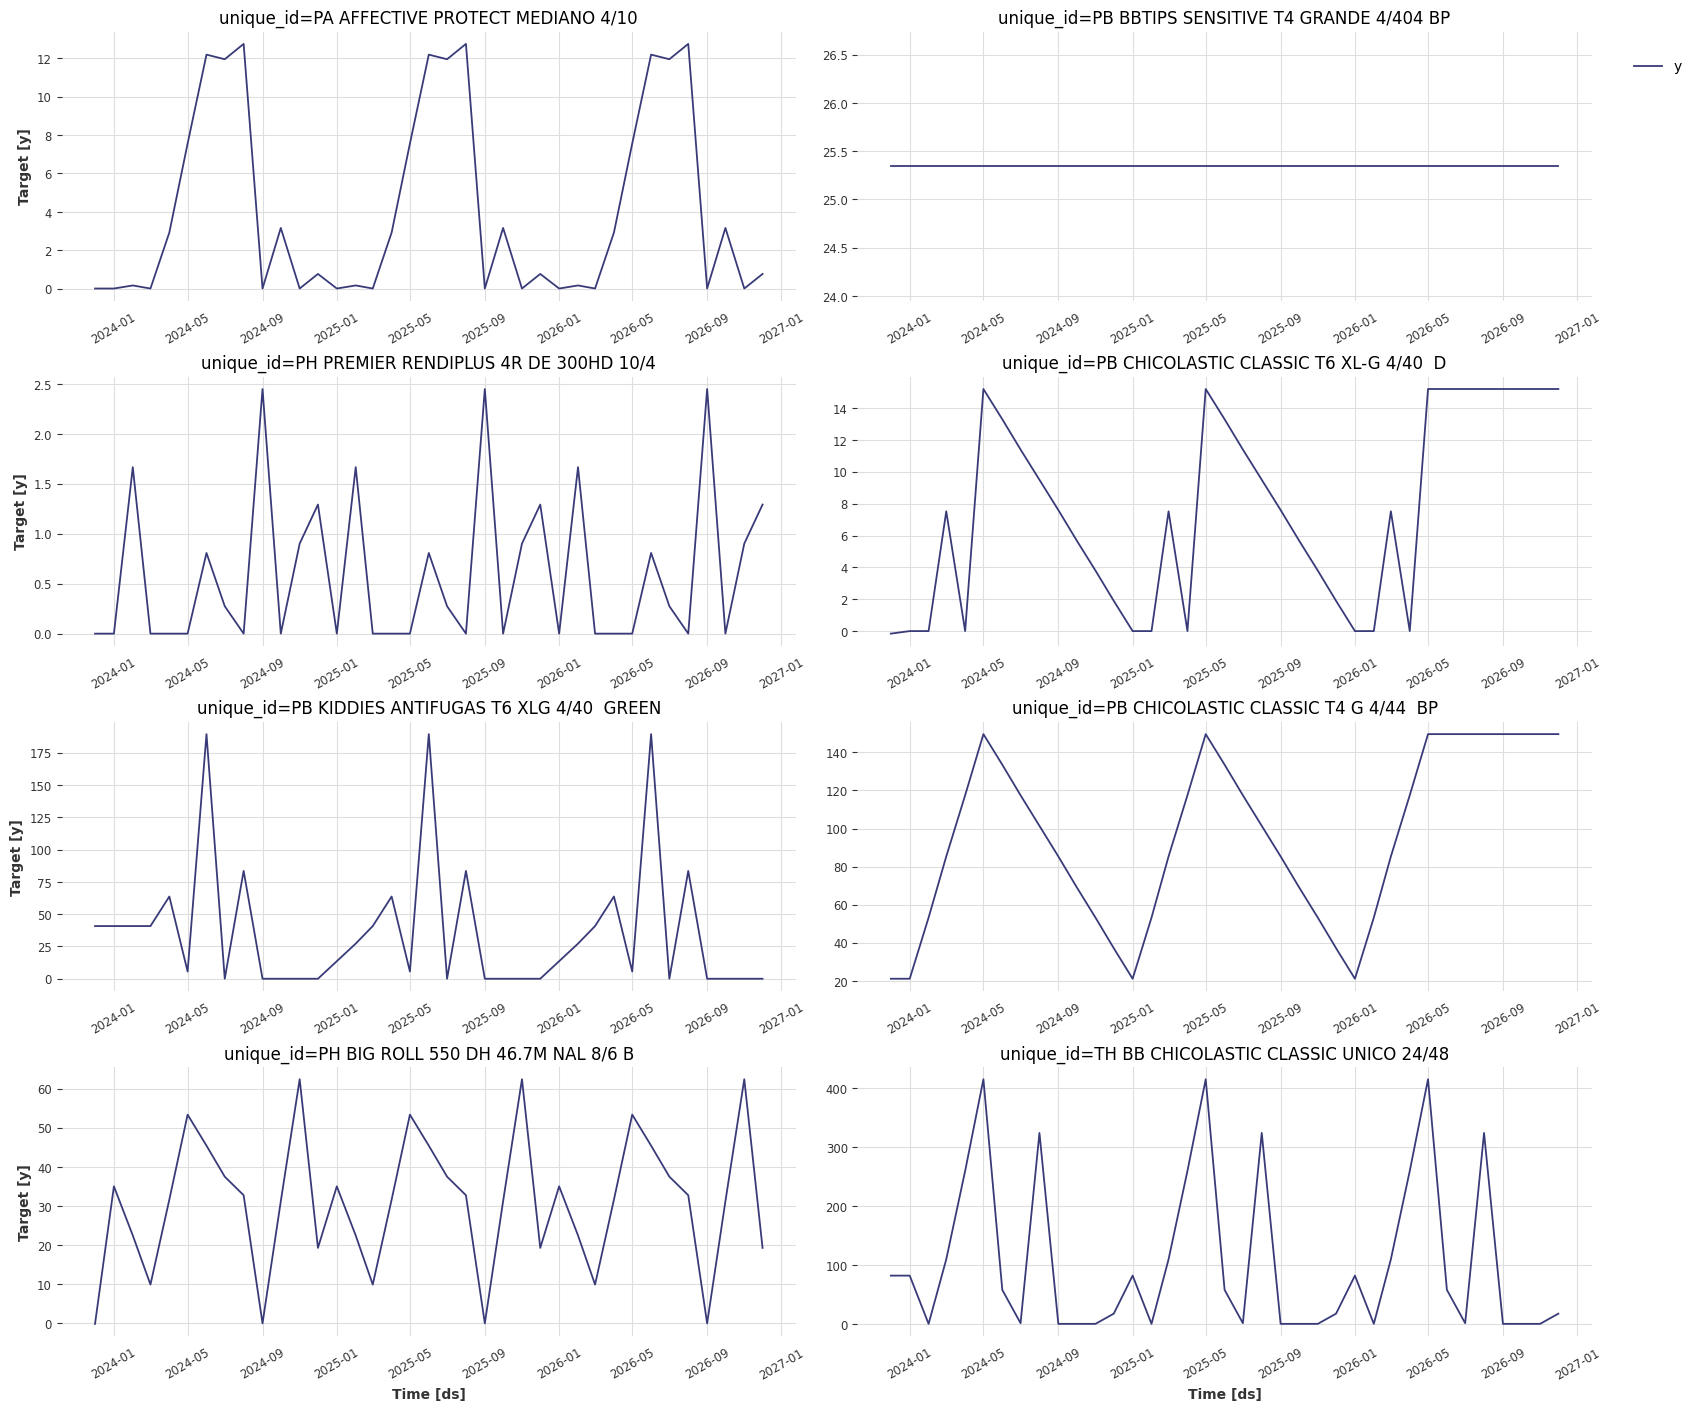

In [ ]:
nixtla_client.plot(df)

## 3. Forecasting Multiple Series

https://towardsdatascience.com/filling-gaps-in-time-series-data-2db7366f1965/

To forecast all series at once, we simply pass the dataframe to the `df` argument. TimeGPt will automatically forecast all series.

In [ ]:
timegpt_fcst_multiseries_df = nixtla_client.forecast(df=df,
                                                     h=24,
                                                     level=[80, 90],
                                                     freq= "MS")
timegpt_fcst_multiseries_df.head()

,unique_id,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-80,TimeGPT-lo-90
0,PA AFFECTIVE PREDOBLADO 60X90 6/10,2027-01-01,3.888992,4.267193,4.314469,3.510790,3.463515
1,PA AFFECTIVE PREDOBLADO 60X90 6/10,2027-02-01,0.684394,3.154600,3.463376,-1.785812,-2.094588
2,PA AFFECTIVE PREDOBLADO 60X90 6/10,2027-03-01,3.548330,4.425106,4.534703,2.671554,2.561957
3,PA AFFECTIVE PREDOBLADO 60X90 6/10,2027-04-01,1.109187,3.016692,3.255131,-0.798319,-1.036757
4,PA AFFECTIVE PREDOBLADO 60X90 6/10,2027-05-01,2.482656,2.603502,2.618607,2.361811,2.346705


In [ ]:
# export
timegpt_fcst_multiseries_df.to_csv('timegpt_fcst_multiseries_df.csv', index=False)

> 📘 Available models in Azure AI
>
> If you are using an Azure AI endpoint, please be sure to set `model="azureai"`:
>
> `nixtla_client.forecast(..., model="azureai")`
>
> For the public API, we support two models: `timegpt-1` and `timegpt-1-long-horizon`.
>
> By default, `timegpt-1` is used. Please see [this tutorial](https://docs.nixtla.io/docs/tutorials-long_horizon_forecasting) on how and when to use `timegpt-1-long-horizon`.

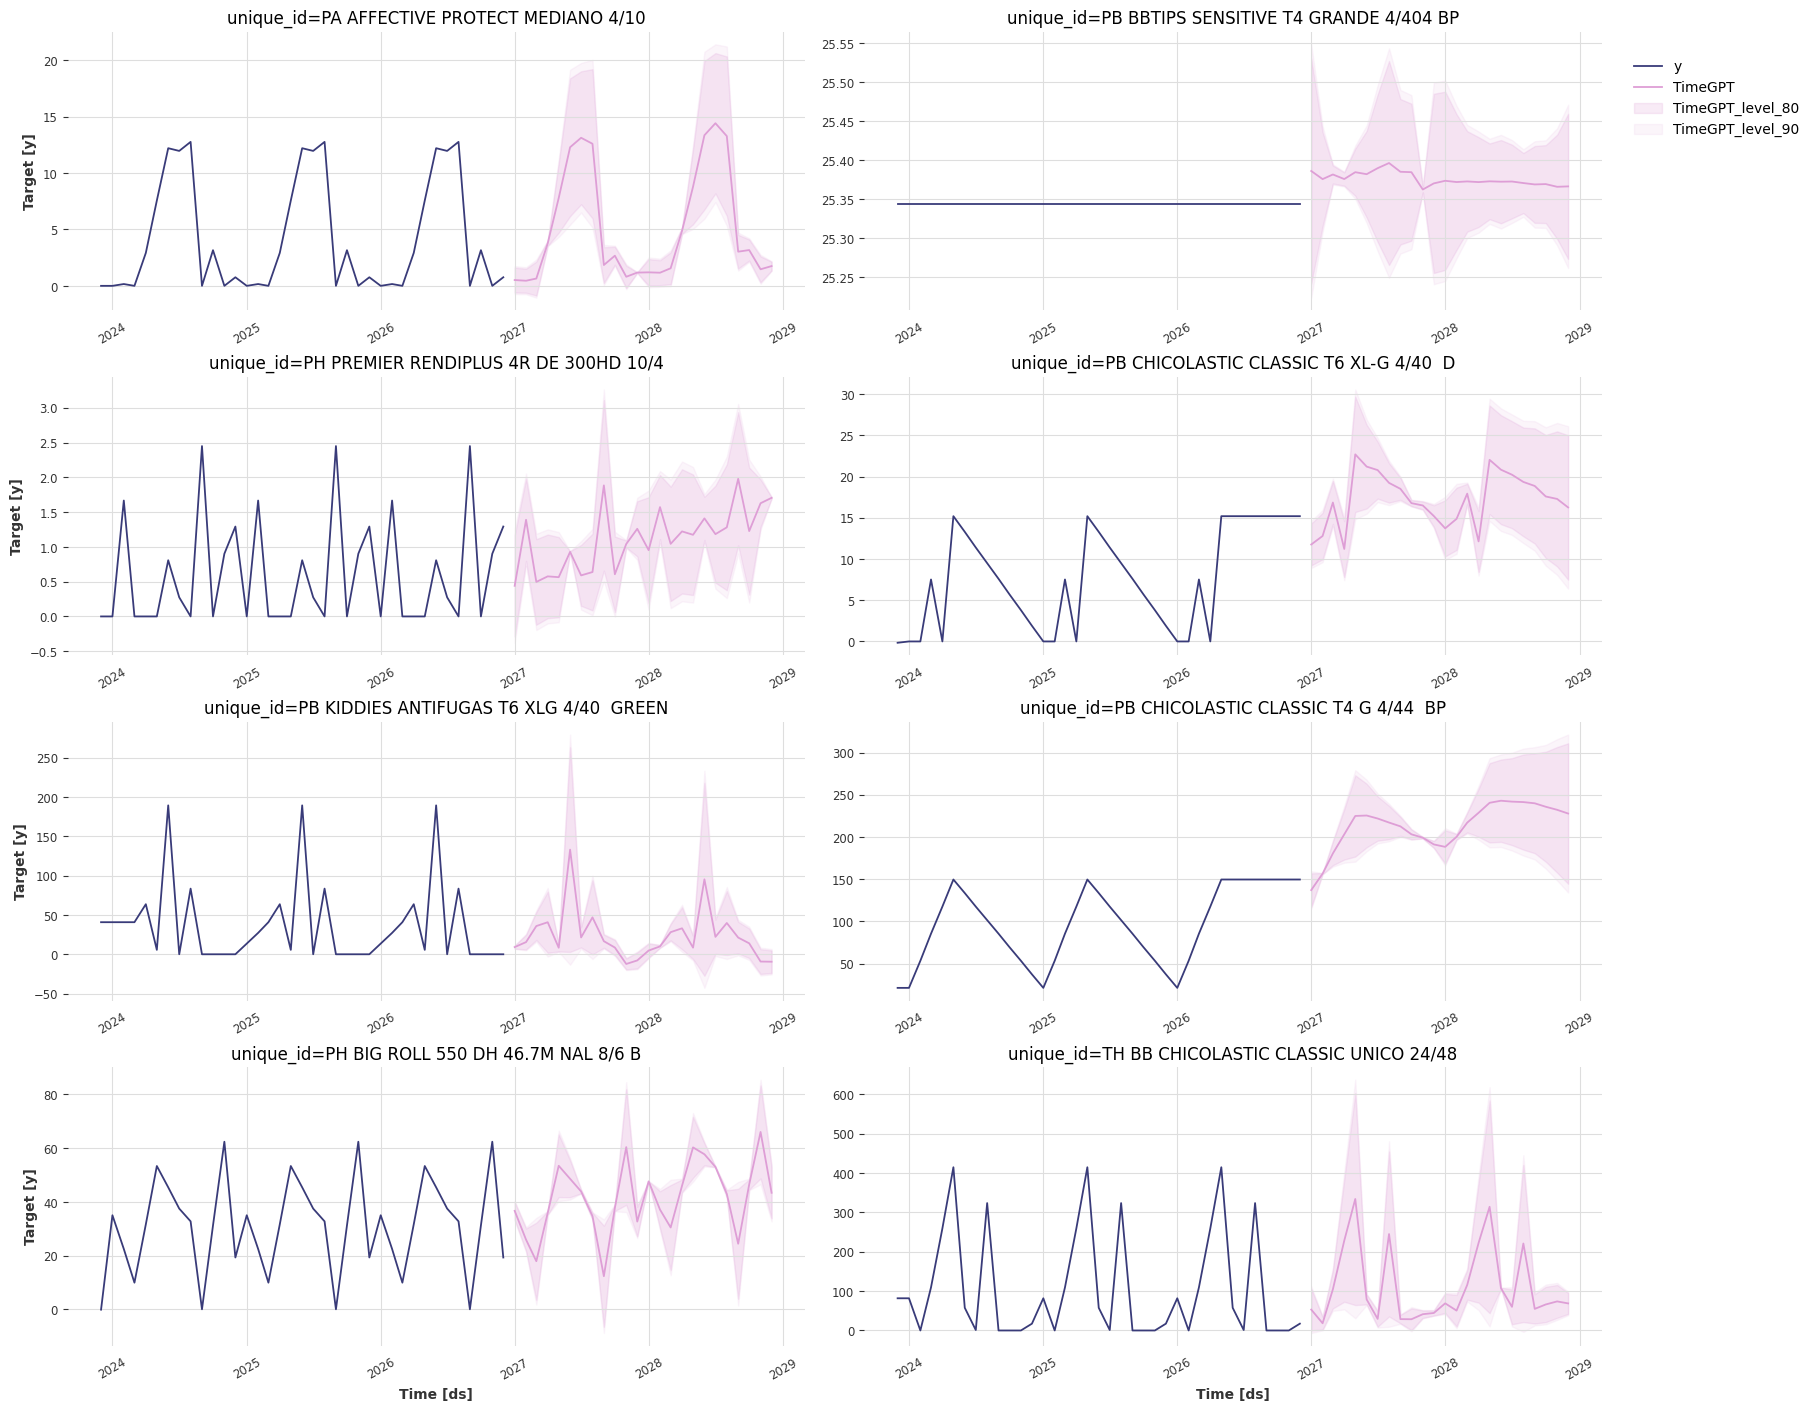

In [ ]:
nixtla_client.plot(df, timegpt_fcst_multiseries_df, max_insample_length=365, level=[80, 90])

From the figure above, we can see that the model effectively generated predictions for each unique series in the dataset.

## Historical forecast

You can also compute prediction intervals for historical forecasts adding the `add_history=True`.

To specify the confidence interval, we use the `level` argument. Here, we pass the list `[80, 90]`. This will compute a 80% and 90% confidence interval.

In [ ]:
timegpt_fcst_multiseries_with_history_df = nixtla_client.forecast(df=df, h=24, level=[80, 90], add_history=True)
timegpt_fcst_multiseries_with_history_df.head()

,unique_id,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-80,TimeGPT-lo-90
0,PA AFFECTIVE PREDOBLADO 60X90 6/10,2026-01-01,3.888992,4.975441,5.283434,2.802543,2.494550
1,PA AFFECTIVE PREDOBLADO 60X90 6/10,2026-02-01,0.684394,1.770843,2.078836,-0.402055,-0.710048
2,PA AFFECTIVE PREDOBLADO 60X90 6/10,2026-03-01,3.548330,4.634779,4.942772,2.461881,2.153888
3,PA AFFECTIVE PREDOBLADO 60X90 6/10,2026-04-01,1.109187,2.195636,2.503629,0.022738,-0.285255
4,PA AFFECTIVE PREDOBLADO 60X90 6/10,2026-05-01,2.482656,3.569105,3.877098,1.396207,1.088214


> 📘 Available models in Azure AI
>
> If you are using an Azure AI endpoint, please be sure to set `model="azureai"`:
>
> `nixtla_client.forecast(..., model="azureai")`
>
> For the public API, we support two models: `timegpt-1` and `timegpt-1-long-horizon`.
>
> By default, `timegpt-1` is used. Please see [this tutorial](https://docs.nixtla.io/docs/tutorials-long_horizon_forecasting) on how and when to use `timegpt-1-long-horizon`.

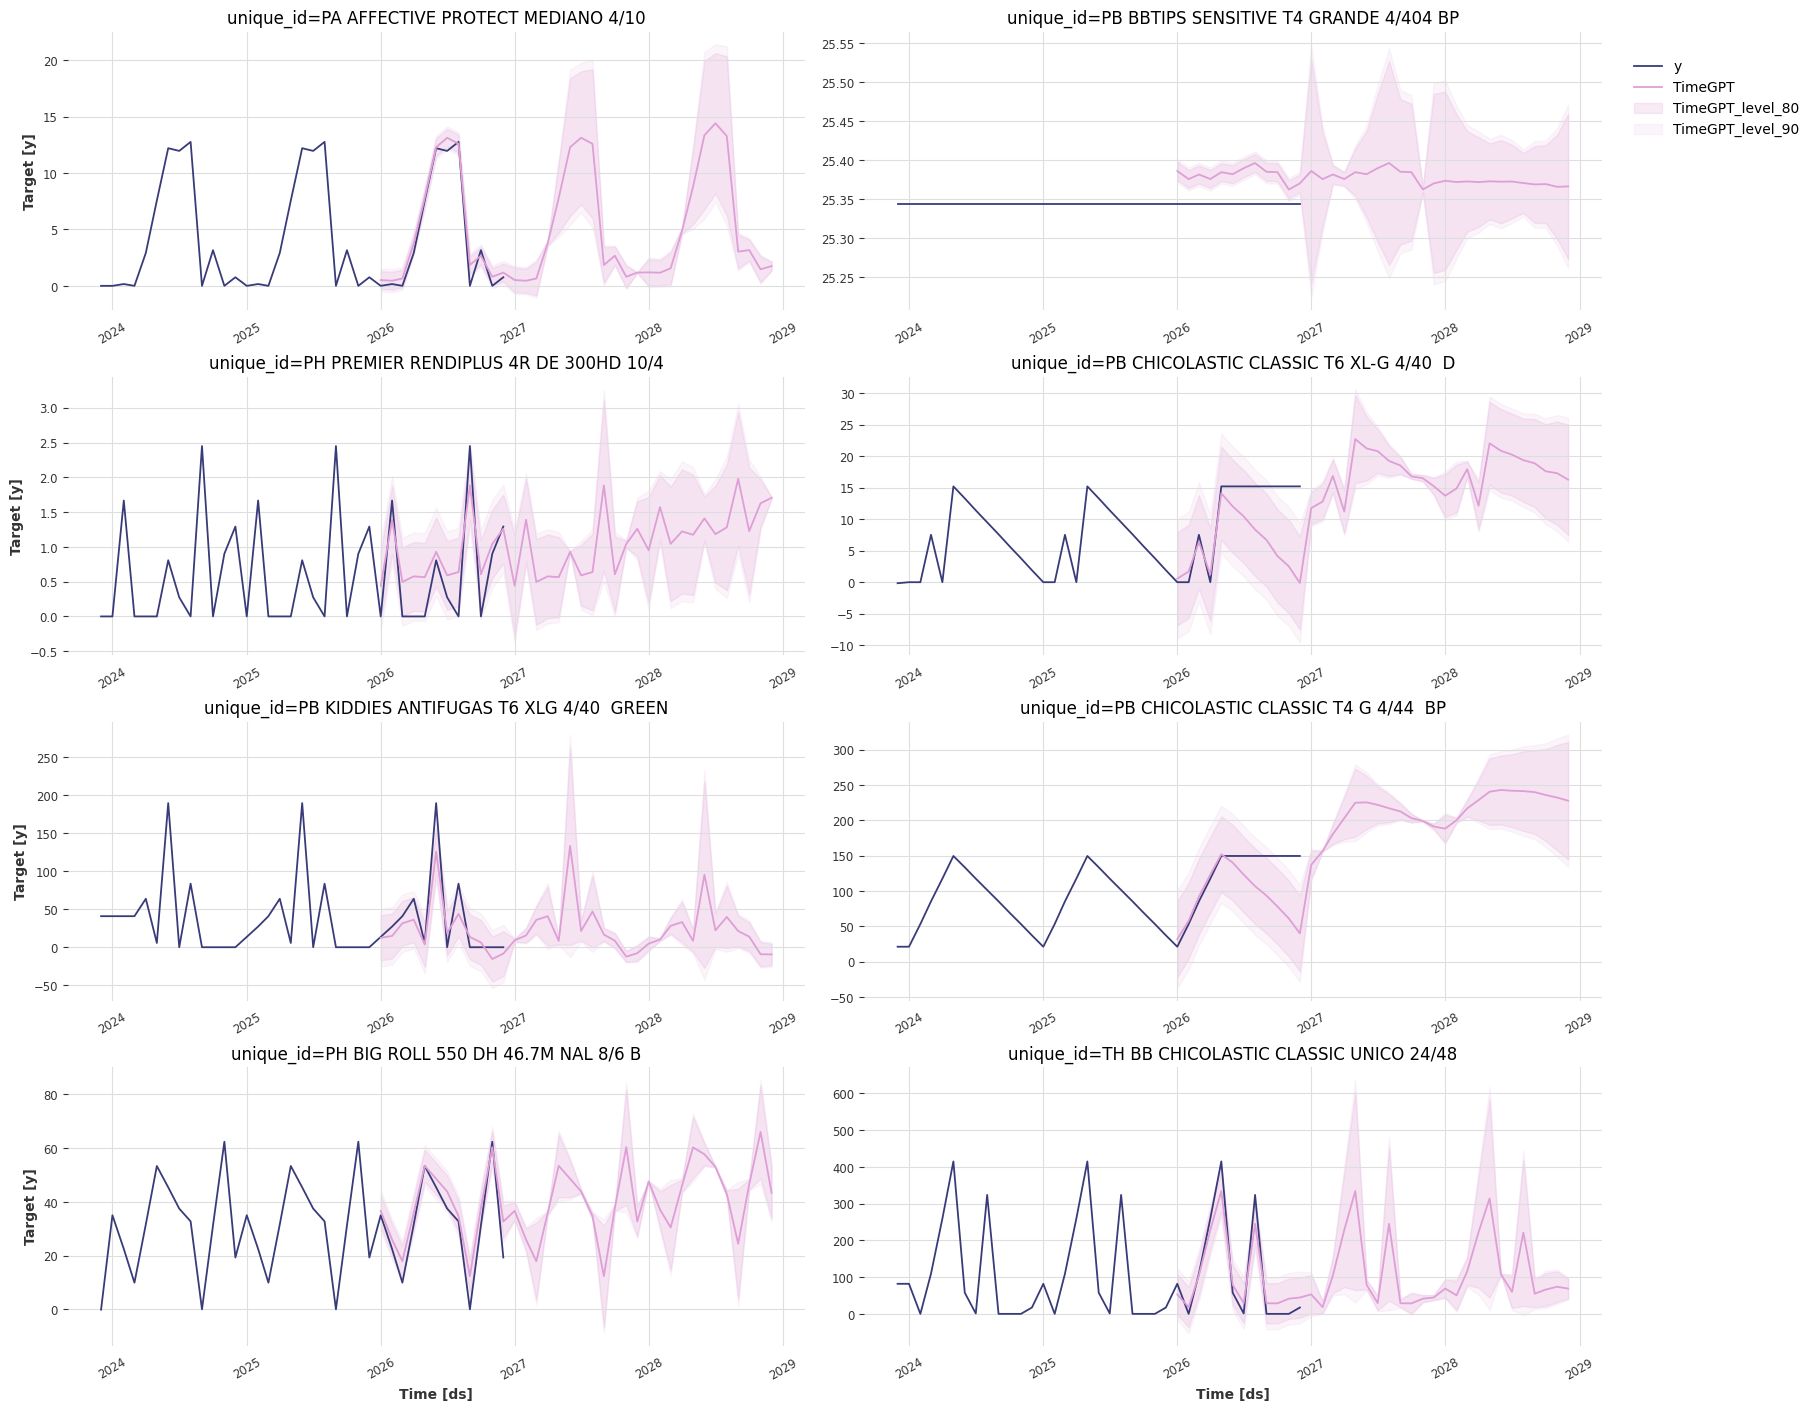

In [ ]:
nixtla_client.plot(
    df,
    timegpt_fcst_multiseries_with_history_df.groupby('unique_id').tail(365 + 24),
    max_insample_length=365,
    level=[80, 90],
)

In the figure above, we now see the historical predictions made by TimeGPT for each series, along with the 80% and 90% confidence intervals.

In [ ]:
# metrics evaluation
